In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from tabulate import tabulate
import matplotlib.pyplot as plt

In [43]:
X = np.arange(0, 1000, 0.002)
y_clean = np.sin(1 * X) + np.sin(1 * X)
noise = np.random.uniform(-0.1, 1, size=X.shape)
y_noisy = y_clean + noise



In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, train_size=0.8, shuffle=False)

X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)


In [45]:
model_linear = LinearRegression()

start_time = time.time()
model_linear.fit(X_train_reshaped, y_train)
end_time = time.time()
train_duration_linear = end_time - start_time

start_time = time.time()
y_pred_train_linear = model_linear.predict(X_train_reshaped)
y_pred_test_linear = model_linear.predict(X_test_reshaped)
end_time = time.time()
predict_duration_linear = end_time - start_time

mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
mse_test_linear = mean_squared_error(y_test, y_pred_test_linear)

sse_train_linear = mse_train_linear * len(y_train)
sse_test_linear = mse_test_linear * len(y_test)


In [46]:
model_ridge = Ridge(alpha=1.0)

X_train_reshaped = X_train.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)


start_time = time.time()
model_ridge.fit(X_train_reshaped, y_train)
end_time = time.time()
train_duration_ridge = end_time - start_time

start_time = time.time()
y_pred_train_ridge = model_ridge.predict(X_train_reshaped)
y_pred_test_ridge = model_ridge.predict(X_test_reshaped)
end_time = time.time()
predict_duration_ridge = end_time - start_time

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)

sse_train_ridge = np.sum((y_pred_train_ridge - y_train) ** 2)
sse_test_ridge = np.sum((y_pred_test_ridge - y_test) ** 2)


In [47]:
model_lasso = Lasso(alpha=0.1)

start_time = time.time()
model_lasso.fit(X_train_reshaped, y_train)
end_time = time.time()
train_duration_lasso = end_time - start_time

start_time = time.time()
y_pred_train_lasso = model_lasso.predict(X_train_reshaped)
y_pred_test_lasso = model_lasso.predict(X_test_reshaped)
end_time = time.time()
predict_duration_lasso = end_time - start_time

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

sse_train_lasso = np.sum((y_pred_train_lasso - y_train) ** 2)
sse_test_lasso = np.sum((y_pred_test_lasso - y_test) ** 2)

In [48]:
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

start_time = time.time()
model_elastic.fit(X_train_reshaped, y_train)
end_time = time.time()
train_duration_elastic = end_time - start_time

start_time = time.time()
y_pred_train_elastic = model_elastic.predict(X_train_reshaped)
y_pred_test_elastic = model_elastic.predict(X_test_reshaped)
end_time = time.time()
predict_duration_elastic = end_time - start_time

mse_train_elastic = mean_squared_error(y_train, y_pred_train_elastic)
mse_test_elastic = mean_squared_error(y_test, y_pred_test_elastic)

sse_train_elastic = np.sum((y_pred_train_elastic - y_train) ** 2)
sse_test_elastic = np.sum((y_pred_test_elastic - y_test) ** 2)


In [49]:
results_table = []

results_table.append([
    "Linear",
    mse_train_linear,
    mse_test_linear,
    sse_train_linear,
    sse_test_linear,
    train_duration_linear,
    predict_duration_linear
])

# Ridge
results_table.append([
    "Ridge",
    mse_train_ridge,
    mse_test_ridge,
    sse_train_ridge,
    sse_test_ridge,
    train_duration_ridge,
    predict_duration_ridge
])

results_table.append([
    "Lasso",
    mse_train_lasso,
    mse_test_lasso,
    sse_train_lasso,
    sse_test_lasso,
    train_duration_lasso,
    predict_duration_lasso
])

results_table.append([
    "ElasticNet",
    mse_train_elastic,
    mse_test_elastic,
    sse_train_elastic,
    sse_test_elastic,
    train_duration_elastic,
    predict_duration_elastic
])


headers = ["Model", "MSE Train", "MSE Test", "SSE Train", "SSE Test", "Train Time (s)", "Predict Time (s)"]

print(tabulate(results_table, headers=headers, floatfmt=".4f", tablefmt="grid"))

+------------+-------------+------------+-------------+-------------+------------------+--------------------+
| Model      |   MSE Train |   MSE Test |   SSE Train |    SSE Test |   Train Time (s) |   Predict Time (s) |
+============+=============+============+=============+=============+==================+====================+
| Linear     |      2.1014 |     2.0924 | 840547.3751 | 209241.5548 |           0.0170 |             0.0000 |
+------------+-------------+------------+-------------+-------------+------------------+--------------------+
| Ridge      |      2.1014 |     2.0924 | 840547.3751 | 209241.5548 |           0.0105 |             0.0077 |
+------------+-------------+------------+-------------+-------------+------------------+--------------------+
| Lasso      |      2.1014 |     2.0924 | 840547.4501 | 209242.8437 |           0.0094 |             0.0000 |
+------------+-------------+------------+-------------+-------------+------------------+--------------------+
| ElasticN

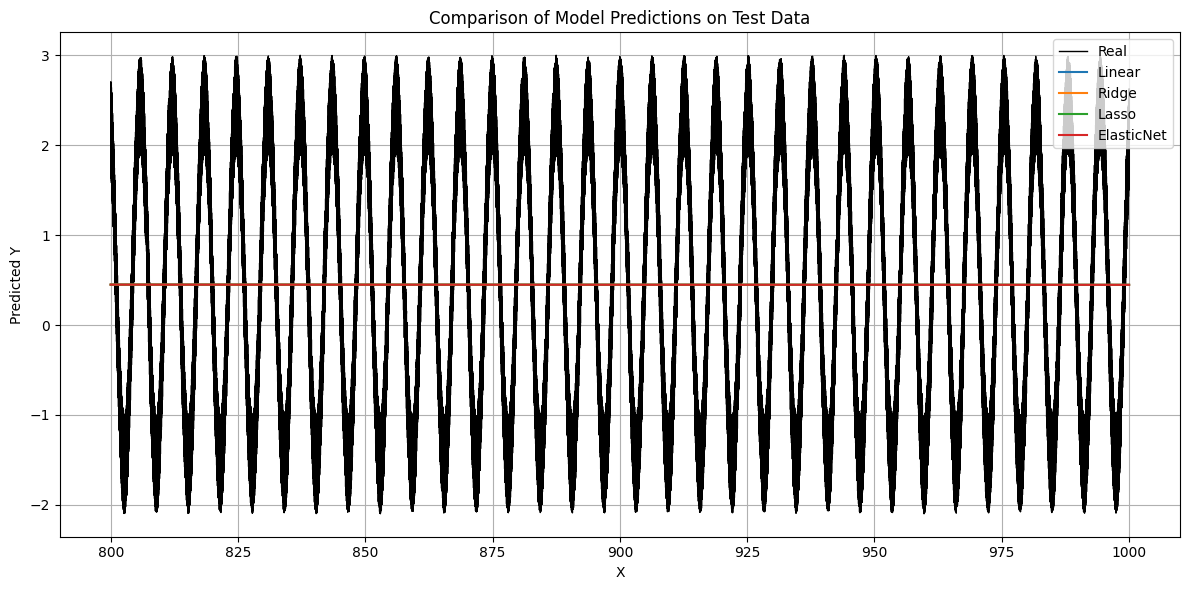

In [50]:
plt.figure(figsize=(12, 6))

plt.plot(X_test, y_test, label="Real", color="black", linewidth=1)

plt.plot(X_test, y_pred_test_linear, label="Linear")
plt.plot(X_test, y_pred_test_ridge, label="Ridge")
plt.plot(X_test, y_pred_test_lasso, label="Lasso")
plt.plot(X_test, y_pred_test_elastic, label="ElasticNet")

plt.title("Comparison of Model Predictions on Test Data")
plt.xlabel("X")
plt.ylabel("Predicted Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()